# IBM Stock Data Analysis

This notebook performs an analysis on the IBM stock data. I am going to load the data, visualize the closing prices, and conduct statistical tests to analyze correlations and test for stationarity. Following the initial analysis, I'll then apply differencing to remove non-stationarity and re-evaluate the time series.




## Setup and Data Loading

First, I imported necessary libraries and suppressed any deprecation warnings. I also loaded the IBM stock data from a CSV file.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf, adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings("ignore")

ibm_data = pd.read_csv('IBM.csv', index_col='Date', parse_dates=True)
ibm_close = ibm_data['Close']

## Visualizing the Data
Next I plotted the closing prices to visualize the data.

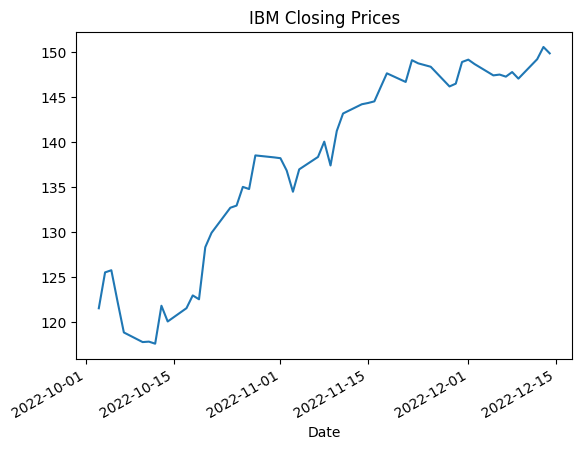

In [ ]:
ibm_close.plot(title='IBM Closing Prices')
plt.show()

## Autocorrelation Analysis
I analyzed the correlations in the daily closing price time series using the autocorrelation plot.



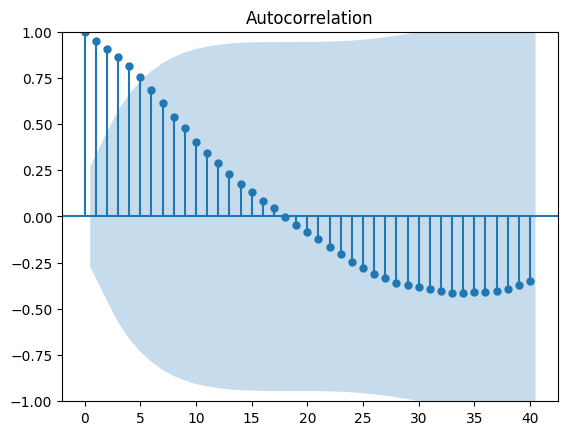

In [ ]:
plot_acf(ibm_close, lags=40)
plt.show()

## Stationarity Tests
I performed the Augmented Dickey-Fuller test to check the stationarity of the time series.

In [ ]:
adf_result = adfuller(ibm_close)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: -0.939826515072951
p-value: 0.7745742973095586


## Differencing the Time Series
Then I performed differencing to make the time series stationary.

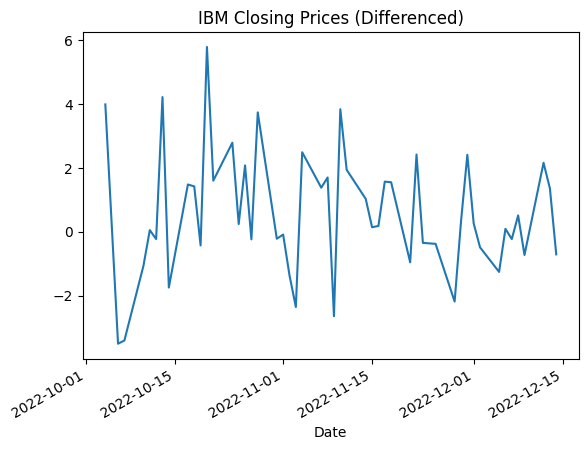

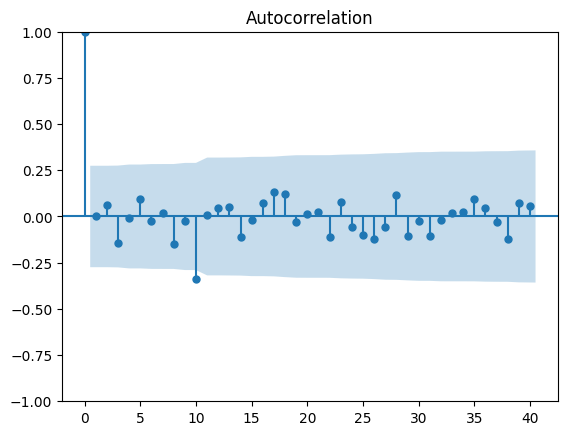

In [ ]:
ibm_close_diff = ibm_close.diff().dropna()
ibm_close_diff.plot(title='IBM Closing Prices (Differenced)')
plt.show()
plot_acf(ibm_close_diff, lags=40)
plt.show()

## Re-evaluating with Ljung-Box and ADF Tests
After differencing, I repeated the Ljung-Box and ADF tests to see if the time series has become stationary.

In [ ]:
ljung_box_diff_results = acorr_ljungbox(ibm_close_diff, lags=[20], return_df=True)
print(ljung_box_diff_results)

adf_diff_result = adfuller(ibm_close_diff)
print(f'ADF Statistic (Differenced): {adf_diff_result[0]}')
print(f'p-value (Differenced): {adf_diff_result[1]}')

      lb_stat  lb_pvalue
20  15.453292   0.749909
ADF Statistic (Differenced): -3.497541402523716
p-value (Differenced): 0.008050461013716053


## White Noise Analysis
Finally, I stimulated a white noise series and add it to the IBM closing price data to examine the effect.



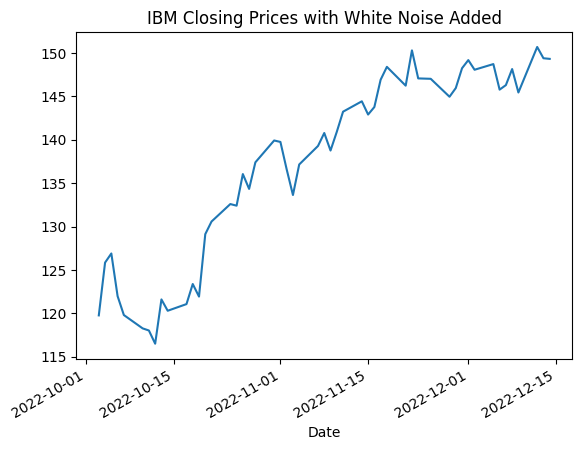

       lb_stat     lb_pvalue
20  318.472483  1.343661e-55
ADF Statistic (Noisy): -0.7448069328438962
p-value (Noisy): 0.8347997606209474
KPSS Statistic (Noisy): 1.0417070758630678
p-value (Noisy): 0.01


In [ ]:
np.random.seed(100)
white_noise = np.random.normal(loc=0, scale=1, size=len(ibm_close))
ibm_close_noisy = ibm_close + white_noise

ibm_close_noisy.plot(title='IBM Closing Prices with White Noise Added')
plt.show()

ljung_box_noisy_results = acorr_ljungbox(ibm_close_noisy, lags=[20], return_df=True)
print(ljung_box_noisy_results)

adf_noisy_result = adfuller(ibm_close_noisy)
print(f'ADF Statistic (Noisy): {adf_noisy_result[0]}')
print(f'p-value (Noisy): {adf_noisy_result[1]}')

kpss_noisy_result = kpss(ibm_close_noisy, nlags='auto')
print(f'KPSS Statistic (Noisy): {kpss_noisy_result[0]}')
print(f'p-value (Noisy): {kpss_noisy_result[1]}')


## Performing the Ljung-Box Test on White Noise Data
Then, I performed the Ljung-Box test again, this time on the white noise data, to assess the autocorrelation in the white noise series.

In [ ]:
ljung_box_white_noise_results = acorr_ljungbox(ibm_close_noisy, lags=[20], return_df=True)
print("Ljung-Box test results for white noise data:")
print(ljung_box_white_noise_results)


Ljung-Box test results for white noise data:
       lb_stat     lb_pvalue
20  318.472483  1.343661e-55


## Augmented Dickey-Fuller Test for Stationarity on White Noise + Closing Prices
I also used the Augmented Dickey-Fuller test to check for stationarity in the white noise added to the closing prices data. A p-value greater than 0.05 suggests that we cannot reject the null hypothesis, indicating non-stationarity.

In [ ]:
adf_result_noisy = adfuller(ibm_close_noisy)
print("Augmented Dickey-Fuller test results for white noise data:")
print(f'ADF Statistic: {adf_result_noisy[0]}')
print(f'p-value: {adf_result_noisy[1]}')


Augmented Dickey-Fuller test results for white noise data:
ADF Statistic: -0.7448069328438962
p-value: 0.8347997606209474


## KPSS Test for Stationarity on White Noise Data
Lastly, the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test is applied to assess stationarity, where a p-value smaller than 0.05 would mean rejecting the null hypothesis of stationarity.

In [ ]:
kpss_result_noisy = kpss(ibm_close_noisy, nlags='auto')
print("KPSS test results for white noise data:")
print(f'KPSS Statistic: {kpss_result_noisy[0]}')
print(f'p-value: {kpss_result_noisy[1]}')


KPSS test results for white noise data:
KPSS Statistic: 1.0417070758630678
p-value: 0.01
